In [3]:
import paddle as paddle
import paddle.fluid as fluid
import numpy as np
import matplotlib.pyplot as plt
import sys
import cv2
import os
import random
import math
import PIL.Image as Image
from paddle.fluid.initializer import MSRA
from paddle.fluid.param_attr import ParamAttr
from visualdl import LogWriter

In [4]:
def produce_path_label(path):
    train_list = [[] * 1 for i in range(0,21)]
    print(len(train_list))
    train_data = open(path).readlines()
    for i in train_data:
        items = i.split(',')
        class_index = int(items[0])
        img = np.array(items[1:]).astype('uint8')
        train_list[class_index].append([img])
    return train_list
train_list = produce_path_label('test_list.txt')

21


In [363]:
yuzhi = 16
data_shape = [64,64]
#定义添加高斯噪声的函数 
def addGaussianNoise(image): 
    G_Noiseimg = np.array(image)
    G_NoiseNum=random.randint(1,5)
    for i in range(G_NoiseNum): 
        temp_x = np.random.randint(0,image.shape[0])
        temp_y = np.random.randint(0,image.shape[0])
        temp_x_size = np.random.randint(1,5)
        temp_y_size = np.random.randint(1,5)
        temp_x_end = min(image.shape[0],temp_x+temp_x_size)
        temp_y_end = min(image.shape[0],temp_y+temp_y_size)
        for x in range(temp_x,temp_x_end):
            for y in range(temp_y,temp_y_end):
                G_Noiseimg[x][y] = 255
    return G_Noiseimg
def temp_reader(label):
    for i in range(1,2):
            #img = cv2.resize(img,(data_shape[0],data_shape[1]))
            #img = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
            #img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
            #下面是有效代码#######################
            if label == 10:#没有10这个数
                        continue
            tmp_ran = train_list[label]
            ran_int = random.randint(0,len(tmp_ran)-1)#取随机的一个数
            img = np.array(tmp_ran[ran_int]).reshape(28,28)
            r_sofang = random.randint(6,12)/10
            shape = int(r_sofang*data_shape[0])
            img = Image.fromarray(img).resize((shape,shape))
            img = np.array(img)
            _, img = cv2.threshold(img, 10, 255,cv2.THRESH_BINARY)
            r_x = random.randint(-15,15)
            r_y = random.randint(-15,15)
            r_rota = random.randint(-10,10)
            r_yh = random.randint(1,3)
            img = Image.fromarray(img)
            img = img.rotate(r_rota)
            tmpimg = Image.new('L',(data_shape[0],data_shape[0]))
            tmpimg.paste(img,(r_x,r_y))
            element1 = cv2.getStructuringElement(cv2.MORPH_RECT, (r_yh, r_yh))
            tmpimg = cv2.dilate(np.array(tmpimg), element1, iterations = 1)
            tmpimg = addGaussianNoise(tmpimg)
            #img = cv2.blur(img,(20,20))#羽化
            #ret, binary = cv2.threshold(img, 50, 255,cv2.THRESH_BINARY)
            #element1 = cv2.getStructuringElement(cv2.MORPH_RECT, (10,10))#拓展
            #img = cv2.erode(binary, element1, iterations = 1)
            img = np.array(tmpimg)
            ##############################################
            img = img.reshape(data_shape[0],data_shape[1]).astype('float32')
            plt.figure(label)
            plt.imshow(img,'Greys')

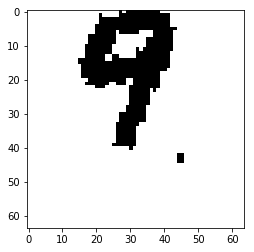

In [397]:
temp_reader(9)